In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/10X_Skin/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from Skin10X_misc_scripts_v1_4 import *
from Skin10X_plot_v1_0 import *
from Skin10X_affinity_propagation_v1_4 import *
from Skin10X_mann_whitney_u_v1_3 import *

/Users/simjoo/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import pickle

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/10X_Skin/scripts/")')
dview.execute('from Skin10X_affinity_propagation_v1_4 import *')
dview.execute('Skin10X_mann_whitney_u_v1_4 import *')

<AsyncResult: execute>

# Import Data

In [10]:
exp_id = '201806201840'
path_input = '/Users/simjoo/Projects/10X_Skin/data_input/v1.5/'
path_output = '/Users/simjoo/Projects/10X_Skin/data_output/v1.5'
path_figures = '/Users/simjoo/Projects/10X_Skin/figures/v1.5'

In [11]:
seq = loadData_v1(path_output, exp_id, 'seq', 'DataFrame')

In [12]:
seqN = loadData_v1(path_output, exp_id, 'seqN', 'DataFrame')

In [13]:
seqN_log2 = np.log2(seqN + 1)

In [14]:
cl_c_1st = loadData_v1(path_output, exp_id, 'cl_c_1st', 'Series')

In [15]:
cl_c_2nd = loadData_v1(path_output, exp_id, 'cl_c_2nd', 'Series')

In [16]:
tsne_1st = loadData_v1(path_output, exp_id, 'tsne_1st', 'DataFrame')

In [17]:
cells_stage = pd.Series([c[-2:] for c in seq.columns], index = seq.columns)

In [18]:
bc = loadData_v1(path_input, exp_id, 'assigned_barcodes', 'Series')
cells_replicate = pd.Series(index = seq.columns)
for ix in cells_replicate.index:
    if type(bc['%s-1' % ix[:-3]]) != str:
        cells_replicate[ix] = '%s unassigned' % ix.split('-')[-1]
    elif bc['%s-1' % ix[:-3]] == 'unassigned':
        cells_replicate[ix] = '%s unassigned' % ix.split('-')[-1]
    else:
        cells_replicate[ix] = bc['%s-1' % ix[:-3]]

In [19]:
path = '%s/%s_cmap_1st.pkl' % (path_output, exp_id)
f = open(path, 'rb')
cmap_1st = pickle.load(f)

In [20]:
path = '%s/%s_cmap_2nd.pkl' % (path_output, exp_id)
f = open(path, 'rb')
cmap_2nd = pickle.load(f)

In [21]:
cmap_time = {'5w':'#fb9a99','9w':'#b2df8a'}

In [22]:
markers_time = {'5w':'o','9w':'o'}

# t-SNE - 1st level clustering - clusters

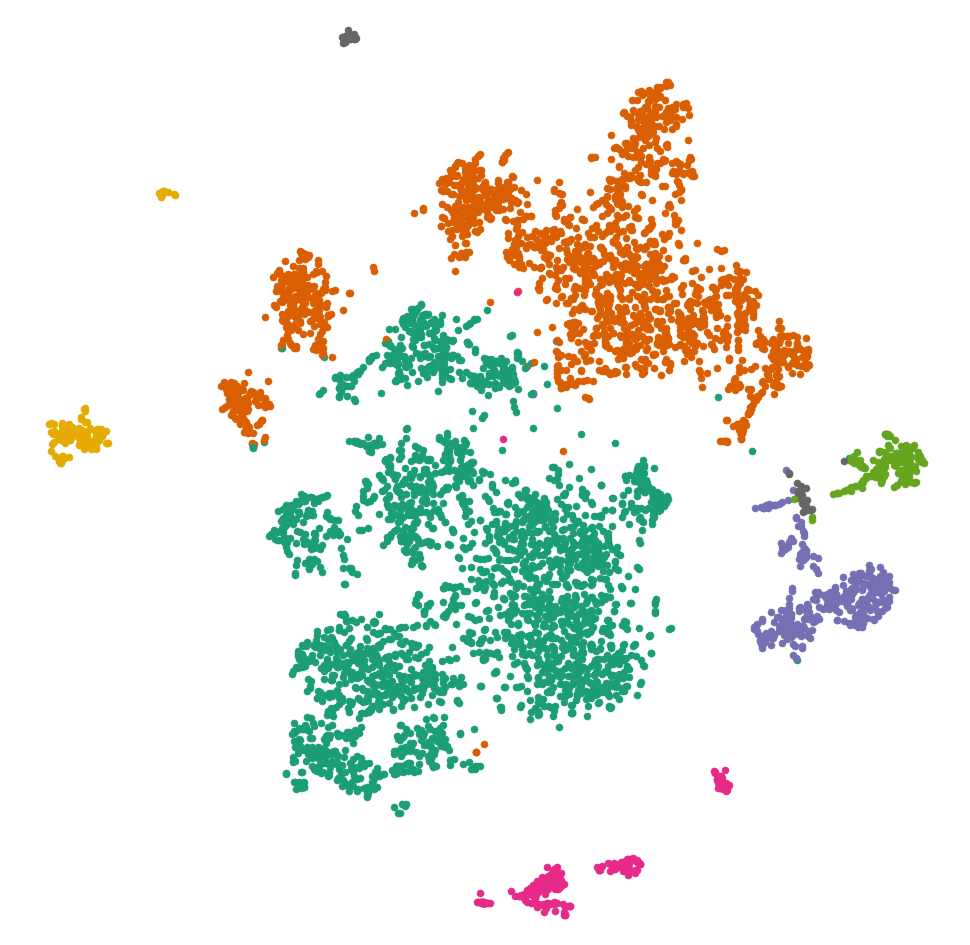

In [23]:
cells = cl_c_1st[cl_c_1st!='JUNK']
tsne = tsne_1st.loc[cells.index]
cmap = cmap_1st
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = list(tsne.index)
np.random.shuffle(index)

for ix in index:

    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 50,
                linewidth = 0.5,
                c = cmap[cells[ix]],
                edgecolor=cmap[cells[ix]], 
                marker = markers[time[ix]])

clean_axis(ax1)

figname = 'v1.5_Fig1_tSNE_1st_cluster.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# t-SNE - time points

In [24]:
Counter(cells_stage[cl_c_1st[cl_c_1st!='JUNK'].index])

Counter({'9w': 2618, '5w': 3149})

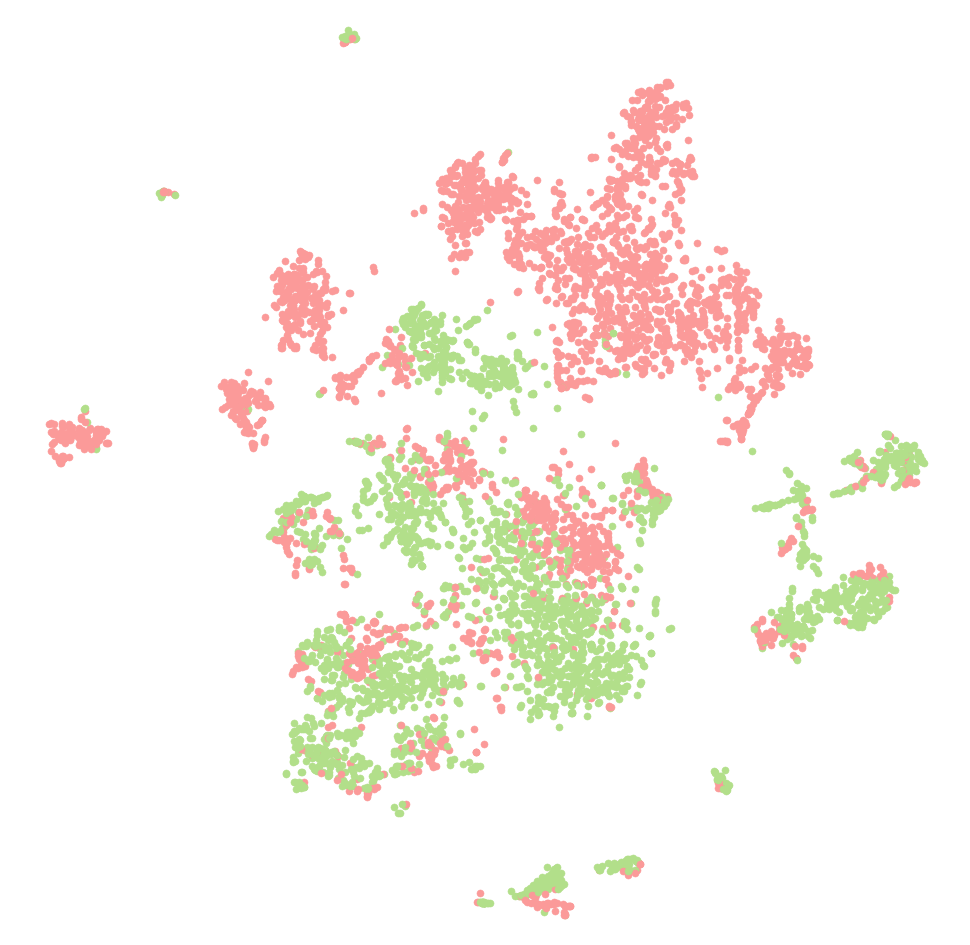

In [25]:
cells = cl_c_1st[cl_c_1st!='JUNK']
tsne = tsne_1st.loc[cells.index]
cmap = cmap_time
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = list(tsne.index)
np.random.shuffle(index)

for ix in index:

    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 50,
                linewidth = 0.5,
                c = cmap[time[ix]],
                edgecolor=cmap[time[ix]], 
                marker = markers[time[ix]])

clean_axis(ax1)

figname = 'v1.5_Fig1_tSNE_1st_time.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# t-SNE - replicates

In [24]:
Counter(cells_replicate[cl].index])

Counter({'9wk1': 1130,
         '9wk2': 1322,
         '5wk2': 1097,
         '5wk3': 628,
         '5wk1': 1402,
         '9w unassigned': 166,
         '5w unassigned': 22})

In [25]:
cmap_replicate = {p:plt.cm.tab20(i/10) for i,p in enumerate(['9wk1','9wk2','9w unassigned',
                                                             '5wk1','5wk2','5wk3','5w unassigned'])}

In [26]:
cmap_replicate = {'9wk1':'#1f77b4',
                  '9wk2':'#aec7e8',
                  '9w unassigned':'#17becf',
                  '5wk1':'#ff7f0e',
                  '5wk2':'#ffbb78',
                  '5wk3':'#d62728',
                  '5w unassigned':'#ff9896'}

In [27]:
cmap_replicate = {'9wk1':'#238b45',
                  '9wk2':'#74c476',
                  '9w unassigned':'#bae4b3',
                  '5wk1':'#cb181d',
                  '5wk2':'#fb6a4a',
                  '5wk3':'#fcae91',
                  '5w unassigned':'#fee5d9'}

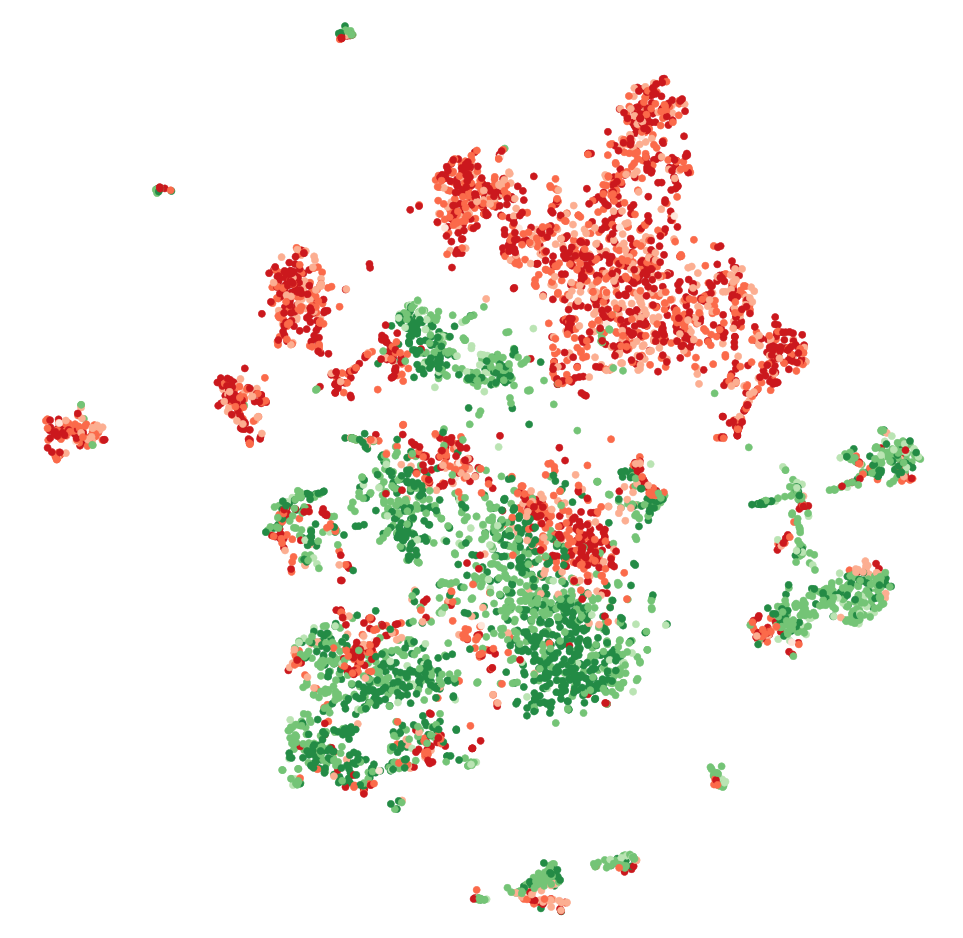

In [28]:
cells = cl_c_1st[cl_c_1st!='JUNK']
tsne = tsne_1st.loc[cells.index]
cmap = cmap_replicate
time = cells_replicate

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = list(tsne.index)
np.random.shuffle(index)

clist = [cmap[time[i]] for i in index]

ax1.scatter(tsne.loc[index,'x'],
            tsne.loc[index,'y'], 
            s = 50,
            linewidth = 0.5,
            c = clist,
            edgecolor=clist)

clean_axis(ax1)

figname = 'v1.5_Fig1_tSNE_1st_replicate.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Barplots - replicates

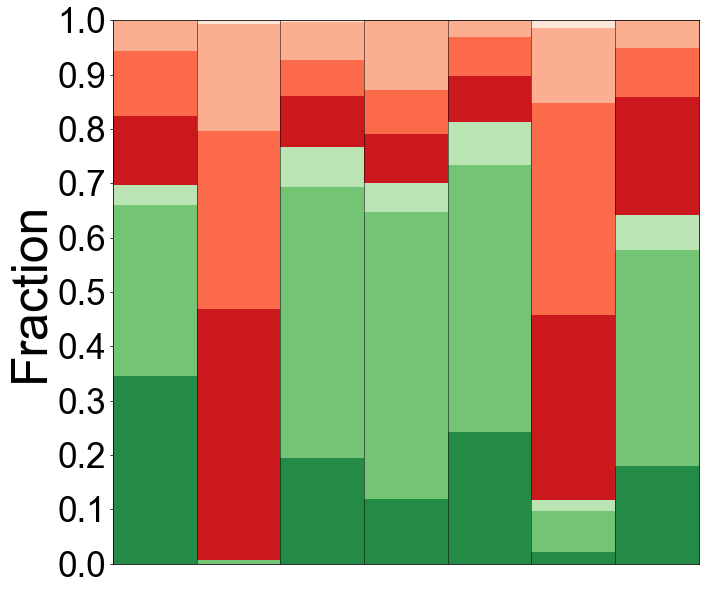

In [30]:
groups = cl_c_1st[cl_c_1st!='JUNK']
replicates = cells_replicate
cmap = cmap_replicate

#initialize figure

height = 10
width = len(return_unique(groups)) * 1.5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#set axes

ax = plt.subplot(111)

ax.set_xlim(-0.5, len(return_unique(groups))-0.5)
ax.set_xticks([])

ax.set_ylim(0,1)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], family = 'Arial', fontsize = 35)
ax.set_ylabel('Fraction', fontsize = 50, family = 'Arial')

#get data

for pos, gr in enumerate(return_unique(groups)):
    c_tmp = groups[groups==gr].index
    l = len(c_tmp)
    rep_tmp = Counter(replicates[c_tmp])
    y = 0
    for r in ['9wk1','9wk2','9w unassigned','5wk1','5wk2','5wk3','5w unassigned']:
        y_new = y + rep_tmp[r]/l
        ax.bar(x = pos, bottom=y, height=y_new, width=1, color = cmap[r])
        y = y_new
    ax.axvline(pos+0.5, color = 'k', linewidth = 0.5)
    
figname = 'v1.5_Fig1_bar_1st_replicate.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Quantification of stage

In [26]:
def stage_get_pval_binomial_distr(n, p, N):
    
    """
    n: number of trials == number of cells in a population
    p: success probability == percentage of anagen cells in whole dataset
    N: number of successes == number of anagen cells in population
    -----
    returns
    pval telogen enrichment: probability to observe N or less anagen cells at random
    pval anagen enrichment: probability to observe n-N or less telogen cells at random
    """
    
    return scipy.stats.binom.cdf(N, n, p), scipy.stats.binom.cdf(n-N, n, 1-p)

In [27]:
Ca = np.mean([7.7e5, 20.0e5, 12.0e5])
Ct = np.mean([5.2e5, 4.2e5])

In [28]:
print(Ca, Ct)

1323333.3333333333 470000.0


In [29]:
Sa = len(cells_stage[cl_c_1st.index][cells_stage[cl_c_1st.index]=='5w'])
St = len(cells_stage[cl_c_1st.index][cells_stage[cl_c_1st.index]=='9w'])

In [30]:
print(Sa, St)

3331 2764


In [31]:
perc_anagen_all = (Sa * Ct) / ((St * Ca) + (Sa * Ct))

In [32]:
perc_anagen_all

0.29973024526812425

In [33]:
ratio = (Sa * Ct) / (St * Ca)

In [34]:
ratio

0.42802112077921606

In [35]:
stage_quant_1st = pd.DataFrame(index = return_unique(cl_c_1st), columns = ['count anagen',
                                                                           '% anagen',
                                                                           'count telogen',
                                                                           '% telogen',
                                                                           'proba - 5w',
                                                                           'proba - 9w'])

for gr in return_unique(cl_c_1st):
    c_sel = cl_c_1st[cl_c_1st==gr].index
    count_tmp = Counter(cells_stage[c_sel])
    
    stage_quant_1st.loc[gr,'count anagen'] = count_tmp['5w']
    stage_quant_1st.loc[gr,'% anagen'] = stage_quant_1st.loc[gr,'count anagen'] / len(c_sel)
    stage_quant_1st.loc[gr,'count telogen'] = count_tmp['9w']
    stage_quant_1st.loc[gr,'% telogen'] = stage_quant_1st.loc[gr,'count telogen'] / len(c_sel)
    stage_quant_1st.loc[gr,['proba - 9w','proba - 5w']] = stage_get_pval_binomial_distr(len(c_sel), perc_anagen_all, stage_quant_1st.loc[gr,'count anagen'])

In [36]:
stage_quant_1st

,count anagen,% anagen,count telogen,% telogen,proba - 5w,proba - 9w
EPI,851,0.302739,1960,0.697261,0.37067,0.644744
ANA,1959,0.992401,15,0.00759878,0,1
FIB,90,0.233766,295,0.766234,0.998378,0.0023517
IMM,63,0.3,147,0.7,0.522612,0.537371
VASC,31,0.187879,134,0.812121,0.99961,0.000756808
MEL,127,0.881944,17,0.118056,4.50718e-48,1
MISC,28,0.358974,50,0.641026,0.154251,0.895697
JUNK,182,0.554878,146,0.445122,7.55362e-22,1


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


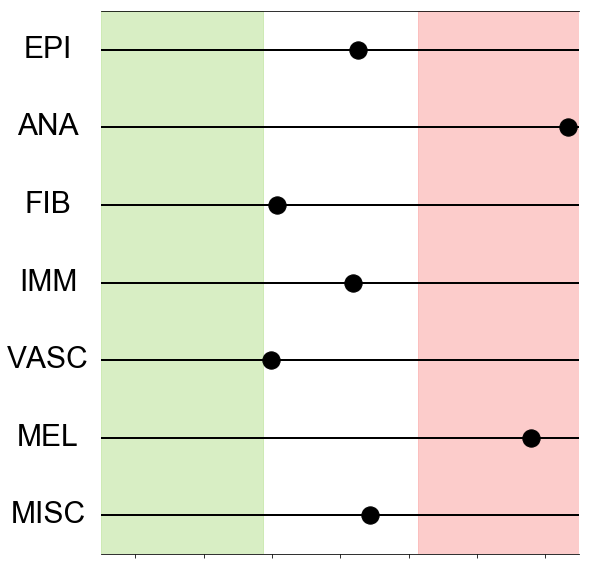

In [37]:
#define input variables

groups = return_unique(cl_c_1st[cl_c_1st!='JUNK'])
L = len(groups)
pval_ana = -np.log10(stage_quant_1st.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_1st.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = 10
width = 10

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])

#iterate over groups
    
for ix, gr in enumerate(groups):
    ax0.text(0.5, ix, gr, family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2)
    """    
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'o', s = 300, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'o', s = 300, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

#set significance tresholds

thr = np.log2(-np.log10(0.001/7)+1) #bonferroni corrected

ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


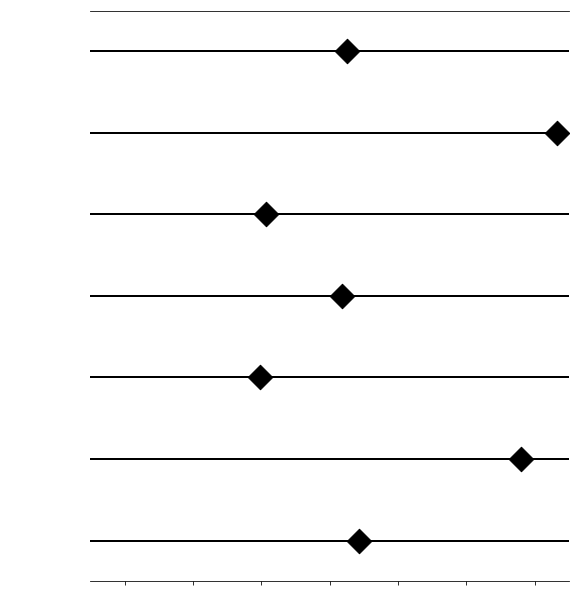

In [39]:
#define input variables

groups = return_unique(cl_c_1st[cl_c_1st!='JUNK'])
L = len(groups)
pval_ana = -np.log10(stage_quant_1st.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_1st.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time
nmap = None

#initialize figure

height = L * 1.5
width = 10

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 300, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 300, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

#set significance tresholds

thr = np.log2(-np.log10(0.001/7)+1) #bonferroni corrected
"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1)

figname = 'v1.5_FigS1_enr_1st.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Cell-cell distance

In [40]:
seq_sel_1st = loadData_v1(path_output, exp_id, 'seq_sel_1st', 'DataFrame')

In [41]:
seq_sel_1st_pca, dist_c_1st = dim_reduc_pca(seq_sel_1st, 30, 'euclidean', inverse_transform = False)

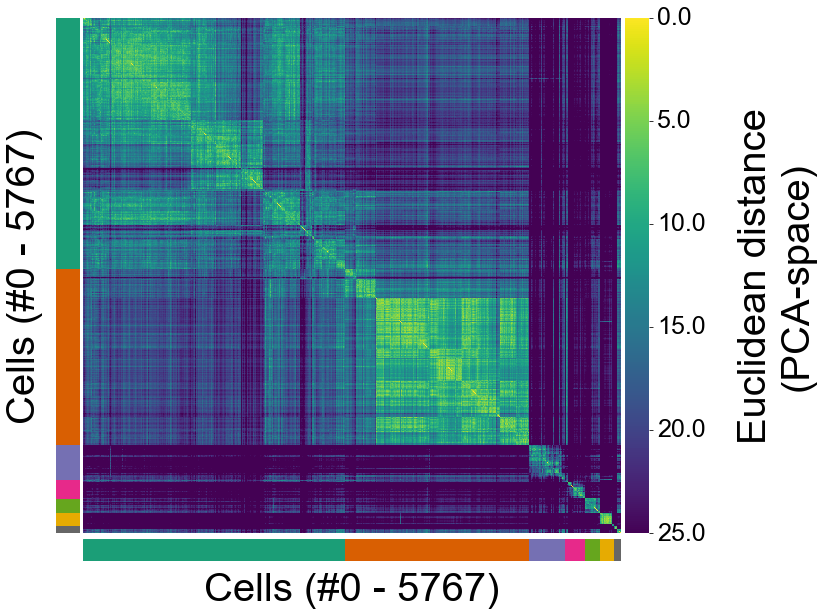

In [42]:
groups = cl_c_1st[cl_c_1st!='JUNK']
dist = dist_c_1st
dist = dist.loc[groups.index, groups.index]
vmin = 0
vmax = 25
cmap = plt.cm.viridis_r
cmap_groups = cmap_1st

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (10.625, 10))
gs = plt.GridSpec(nrows = 2, ncols = 3, wspace=0.02, hspace=0.02, width_ratios=[0.5 , 11.25, 0.5], height_ratios=[11.25, 0.5])

#plot heatmap

axHM = plt.subplot(gs[0, 1])

axHM.matshow(dist, cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax, interpolation = None)
    
axHM.set_xlabel('Cells (#0 - %s)' % len(groups), family = 'Arial', fontsize = 40)
axHM.set_ylabel('Cells (#0 - %s)' % len(groups), family = 'Arial', fontsize = 40)

axHM.xaxis.set_label_coords(0.5, -0.075)
axHM.yaxis.set_label_coords(-0.075, 0.5)
    
axHM.set_yticks([])

clean_axis(axHM)

#plot left sample groups

axSG1 = plt.subplot(gs[0, 0])

axSG1.set_ylim(len(groups), 0)

for pos, gr in enumerate(groups):
    axSG1.axhspan(pos, pos+1, color=cmap_groups[gr])
    
remove_ticks(axSG1)
clean_axis(axSG1)

#plot bottom sample groups

axSG2 = plt.subplot(gs[1, 1])

axSG2.set_xlim(0, len(groups))

for pos, gr in enumerate(groups):
    axSG2.axvspan(pos, pos+1, color=cmap_groups[gr])

remove_ticks(axSG2)
clean_axis(axSG2)

#plot label

axLabel = plt.subplot(gs[0,2])

axLabel.matshow(np.matrix(np.arange(vmin, vmax, 0.1)).T,
                cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks(np.linspace(axLabel.get_ylim()[0], axLabel.get_ylim()[1], 6))
axLabel.set_yticklabels(np.linspace(vmax, vmin, 6), family = 'Arial', fontsize = 25, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=5)

axLabel.set_ylabel('Euclidean distance\n(PCA-space)', family = 'Arial', fontsize = 40)
axLabel.yaxis.set_label_coords(8, 0.5)

figname = 'v1.5_FigS1_cell_cell_distance.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Comparison to AP

In [23]:
umap_1st_AP = loadData_v1(path_output, exp_id, 'umap_1st','DataFrame')
cl_c_1st_AP_sel = loadData_v1(path_output, exp_id, 'cl_c_1st_AP_sel','Series')

## tSNE - AP

In [24]:
cl_c_1st_AP_sel = cl_c_1st_AP_sel[cl_c_1st[cl_c_1st!='JUNK'].index] #to remove cells marked as junk

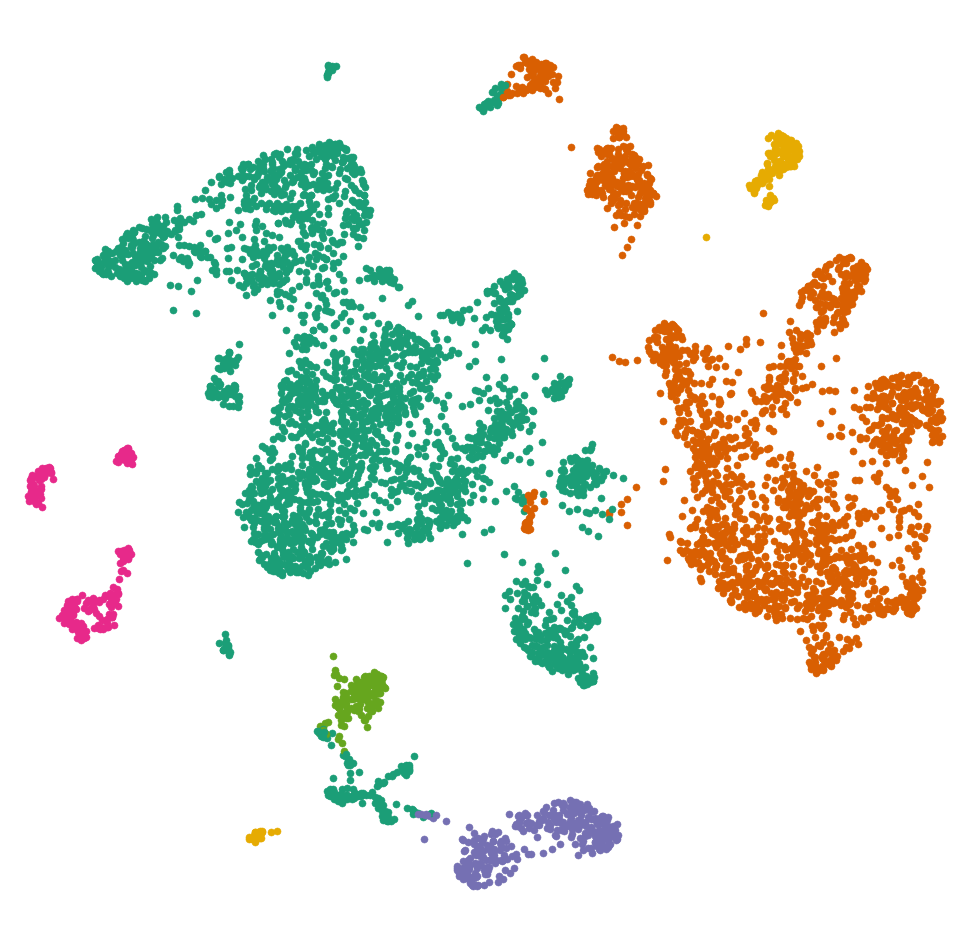

In [45]:
cells = cl_c_1st_AP_sel
tsne = umap_1st_AP.loc[cells.index]
cmap = cmap_1st
time = cells_stage
markers = markers_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

index = list(tsne.index)
np.random.shuffle(index)

for ix in index:

    ax1.scatter(tsne.loc[ix,'x'],
                tsne.loc[ix,'y'], 
                s = 50,
                linewidth = 0.5,
                c = cmap[cells[ix]],
                edgecolor=cmap[cells[ix]], 
                marker = markers[time[ix]])

clean_axis(ax1)

figname = 'v1.5_FigS1_tSNE_1st_AP.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Cell - cell distance - AP

In [46]:
cl_c_1st_AP_sel = AP_groups_reorder_v2(cl_c_1st_AP_sel, ['EPI','ANA','FIB','IMM','VASC','MEL'])

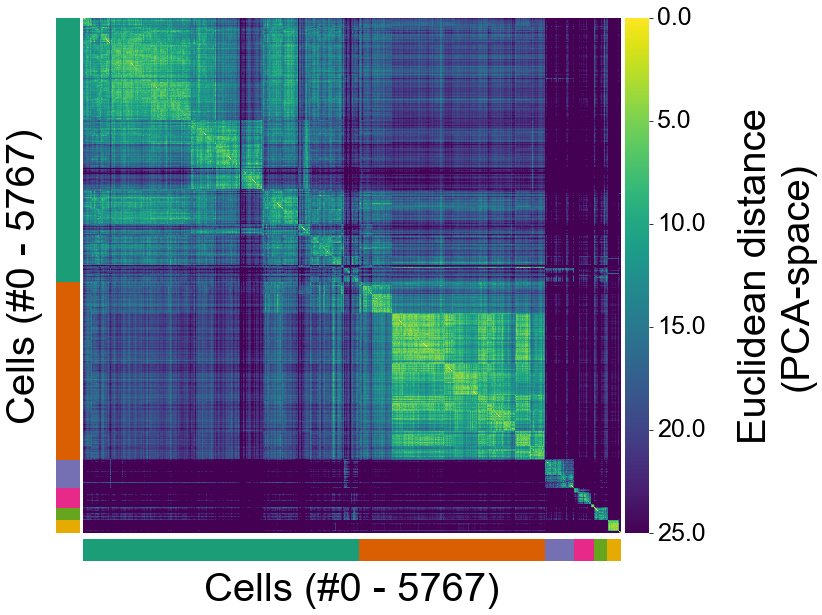

In [47]:
groups = cl_c_1st_AP_sel
dist = dist_c_1st
dist = dist.loc[groups.index, groups.index]
vmin = 0
vmax = 25
cmap = plt.cm.viridis_r
cmap_groups = cmap_1st

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (10.625, 10))
gs = plt.GridSpec(nrows = 2, ncols = 3, wspace=0.02, hspace=0.02, width_ratios=[0.5 , 11.25, 0.5], height_ratios=[11.25, 0.5])

#plot heatmap

axHM = plt.subplot(gs[0, 1])

axHM.matshow(dist, cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax, interpolation = None)
    
axHM.set_xlabel('Cells (#0 - %s)' % len(groups), family = 'Arial', fontsize = 40)
axHM.set_ylabel('Cells (#0 - %s)' % len(groups), family = 'Arial', fontsize = 40)

axHM.xaxis.set_label_coords(0.5, -0.075)
axHM.yaxis.set_label_coords(-0.075, 0.5)
    
axHM.set_yticks([])

clean_axis(axHM)

#plot left sample groups

axSG1 = plt.subplot(gs[0, 0])

axSG1.set_ylim(len(groups), 0)

for pos, gr in enumerate(groups):
    axSG1.axhspan(pos, pos+1, color=cmap_groups[gr])
    
remove_ticks(axSG1)
clean_axis(axSG1)

#plot bottom sample groups

axSG2 = plt.subplot(gs[1, 1])

axSG2.set_xlim(0, len(groups))

for pos, gr in enumerate(groups):
    axSG2.axvspan(pos, pos+1, color=cmap_groups[gr])

remove_ticks(axSG2)
clean_axis(axSG2)

#plot label

axLabel = plt.subplot(gs[0,2])

axLabel.matshow(np.matrix(np.arange(vmin, vmax, 0.1)).T,
                cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks(np.linspace(axLabel.get_ylim()[0], axLabel.get_ylim()[1], 6))
axLabel.set_yticklabels(np.linspace(vmax, vmin, 6), family = 'Arial', fontsize = 25, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=5)

axLabel.set_ylabel('Euclidean distance\n(PCA-space)', family = 'Arial', fontsize = 40)
axLabel.yaxis.set_label_coords(8, 0.5)

figname = 'v1.5_FigS1_cell_cell_distance_AP.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Comparison

In [25]:
def seurat_vs_AP_v2(cl_ix, cl_col, return_counts = False):
    
    #define output
    
    output_perc = pd.DataFrame(index = return_unique(cl_ix), columns = return_unique(cl_col))
    output_count = pd.DataFrame(index = return_unique(cl_ix), columns = return_unique(cl_col))
    
    for col in return_unique(cl_col):
        ix_col = set(cl_col[cl_col==col].index)
        
        for row in return_unique(cl_ix):
            ix_row = set(cl_ix[cl_ix==row].index)
            
            output_perc.loc[row, col] = float(len(ix_row&ix_col)) / float(len(ix_row))
            output_count.loc[row, col] = float(len(ix_row&ix_col))
    
    if return_counts == True:
        return heatmap_diag(output_perc), output_count
    else:    
        return heatmap_diag(output)

In [26]:
seurat_vs_AP_1st_perc, seurat_vs_AP_1st_count = seurat_vs_AP_v2(cl_c_1st[cl_c_1st!='JUNK'], cl_c_1st_AP_sel, True)

In [29]:
from sklearn.metrics import adjusted_rand_score as rand

In [30]:
rand_1st = rand(cl_c_1st[cl_c_1st!='JUNK'], cl_c_1st_AP_sel)

In [31]:
rand_1st

0.8909931593788925

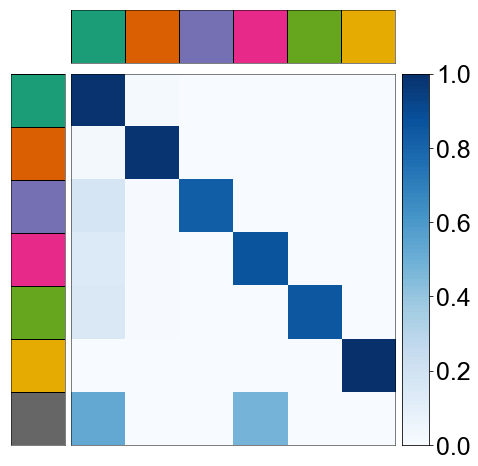

In [94]:
gr_ix = ['EPI','ANA','FIB','IMM','VASC','MEL','MISC']
gr_col = ['EPI','ANA','FIB','IMM','VASC','MEL']

data = seurat_vs_AP_1st_perc.loc[gr_ix, gr_col]

cmap_ix = cmap_1st
cmap_col = cmap_1st

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (len(data.columns) + 1.5, len(data.index) + 1))
gs = plt.GridSpec(nrows = 2, ncols = 3, 
                  wspace=0.05, width_ratios=[1,1*len(data.columns),0.5], 
                  hspace=0.05, height_ratios=[1,1*len(data.index)])

#plot population colors

ax = plt.subplot(gs[1,0])

ax.set_ylim(len(data.index), 0)

for pos, gr in enumerate(data.index):
    ax.axhspan(pos, pos + 1, color = cmap_ix[gr])
    ax.axhline(pos, lw = 1, color = 'k')
    
remove_ticks(ax)

ax = plt.subplot(gs[0,1])

ax.set_xlim(0, len(data.columns))

for pos, gr in enumerate(data.columns):
    ax.axvspan(pos, pos + 1, color = cmap_col[gr])
    ax.axvline(pos, lw = 1, color = 'k')
    
remove_ticks(ax)

#plot data

ax = plt.subplot(gs[1,1])

ax.imshow(data.astype(float),
          cmap = plt.cm.Blues,
          aspect = 'auto',
          interpolation = 'nearest',
          vmin = 0, vmax = 1)

remove_ticks(ax)

#plot legend

ax = plt.subplot(gs[1,2])

ax.set_ylim(0,1)
ax.set_xticks([])

ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], family = 'Arial', fontsize = 25)
ax.yaxis.set_ticks_position('right')

for pos in np.arange(0,1,0.01):
    ax.axhspan(pos, pos + 0.01, color = plt.cm.Blues(pos))
    
figname = 'v1.5_FigS1_seurat_AP_comp.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Differentially expressed genes

## Import scripts and data

In [64]:
def MWU_get_binarized(mwu_pval, cutoff, neglog = True):
    
    output = pd.DataFrame(index = mwu_pval.index, columns = mwu_pval.columns).fillna(0)
    
    if neglog == True:
        output[mwu_pval>=cutoff] = 1
    else:
        output[mwu_pval<cutoff] = 1
    
    return output

In [65]:
def MWU_extract_genes_(mwu_pval, mwu_bin, number = 10, neglog = True):
    
    output = pd.DataFrame(index = range(number), columns = mwu_bin.columns).fillna('None')
    
    for gr in mwu_bin.columns:
        g_bin = mwu_bin[gr][mwu_bin[gr]==1].index
        
        if neglog == True:
            g_sel = mwu_pval.loc[g_bin, gr].sort_values()[-number:].index[::-1]
            #return g_sel
        else:
            g_sel = mwu_pval.loc[g_bin, gr].sort_values()[number:].index
            
        output.loc[range(len(g_sel)), gr] = g_sel
        
    return output

In [66]:
MWU_av_1st = loadData_v1(path_output, exp_id, 'MWU_av_1st','DataFrame')
MWU_gr_1st = loadData_v1(path_output, exp_id, 'MWU_gr_1st','DataFrame')

## Compared to average

In [67]:
MWU_av_1st[MWU_av_1st==np.inf] = 307

In [68]:
MWU_av_1st_bin = MWU_get_binarized(MWU_av_1st, -np.log10(0.001), neglog = True)

In [69]:
MWU_av_1st_genes = MWU_extract_genes_(MWU_av_1st, MWU_av_1st_bin, number = 10, neglog = True)

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize

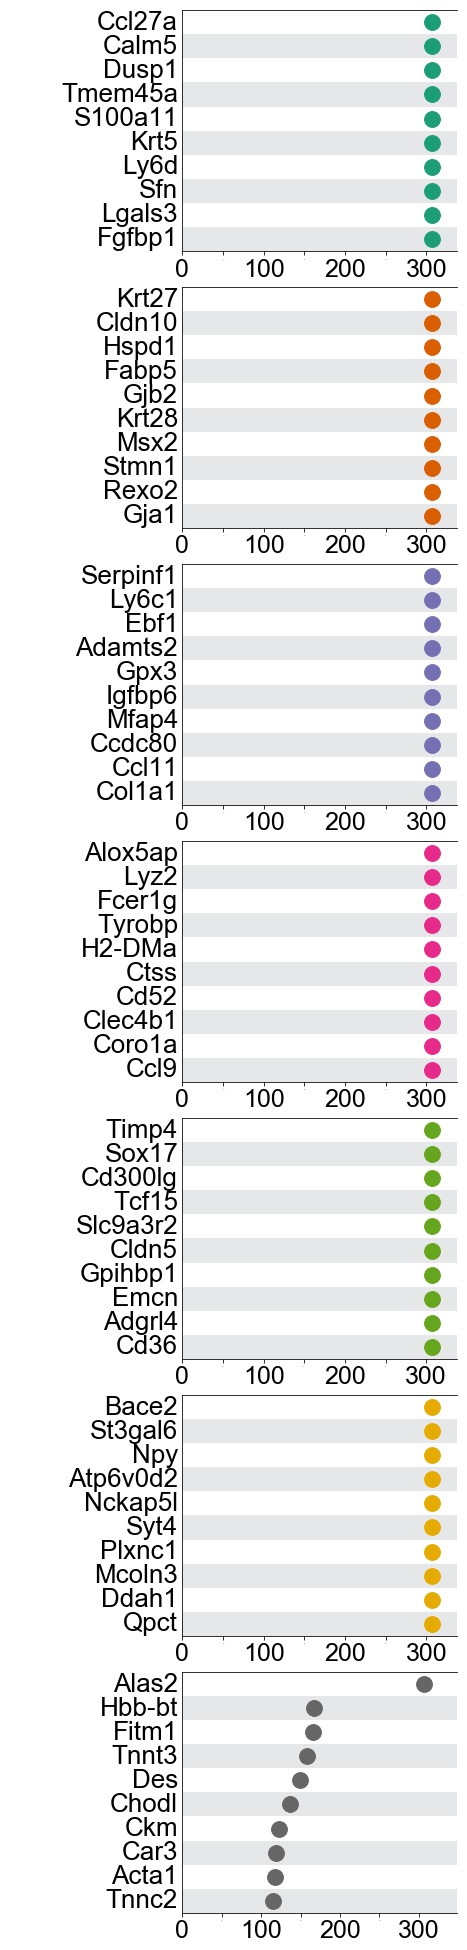

In [70]:
#define input variables

gr_order = ['EPI','ANA','FIB','IMM','VASC','MEL','MISC']
genes = MWU_av_1st_genes
L = len(genes.index)
pval = MWU_av_1st
cmap = cmap_1st

#initialize figure

height = 5 * len(gr_order)
width = 8

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    genes_tmp = [gene for gene in genes[gr].values if gene != 'None']
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Arial', fontsize = 26, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
        if ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
            
        #print pvals
        
        ax1.scatter(pval.loc[g,gr], ix, marker = 'o', s = 250, color = cmap[gr])
        
    xlim = list(ax1.get_xlim())

    ax1.set_xlim(0, xlim[1] * 1.1)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Arial')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
figname = 'v1.5_FigS1_MWU_vs_av_1st.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Compared to groups

In [71]:
MWU_gr_1st[MWU_gr_1st==np.inf] = 307

In [72]:
MWU_gr_1st_bin = MWU_get_binarized(MWU_gr_1st, -np.log10(0.001), neglog = True)

In [73]:
MWU_gr_1st_genes = MWU_extract_genes_(MWU_gr_1st, MWU_gr_1st_bin, number = 10, neglog = True)

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize

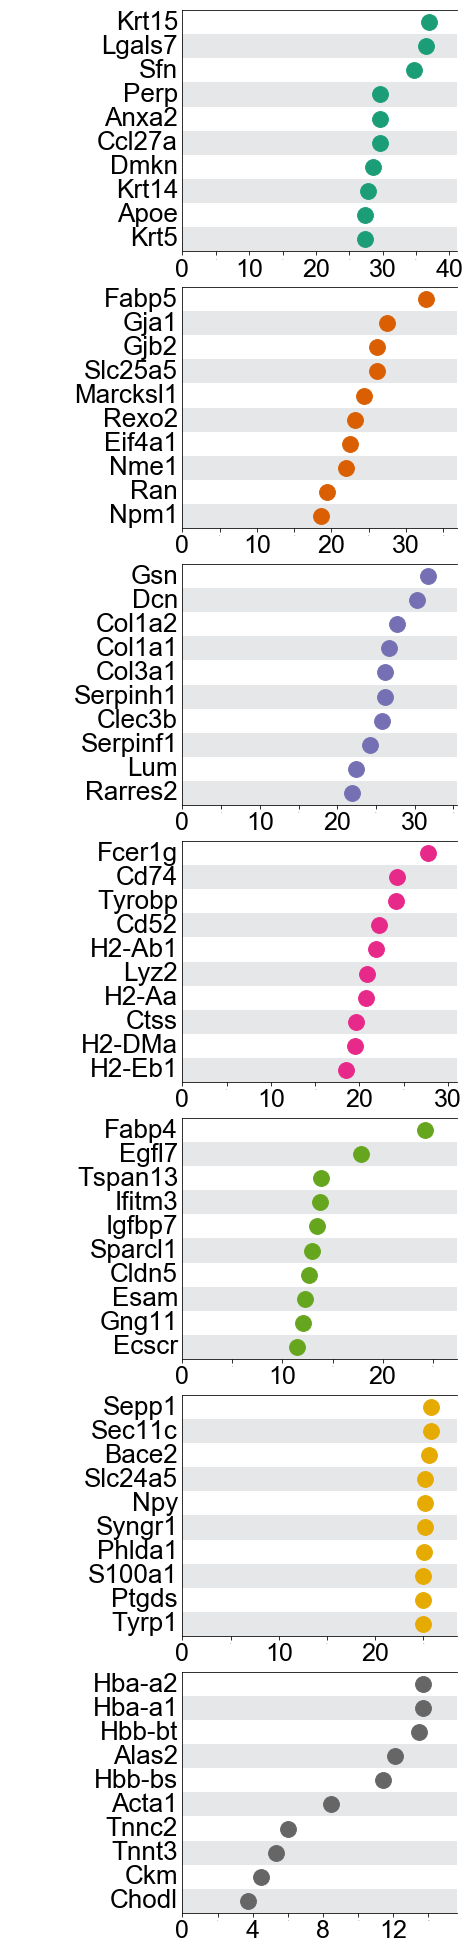

In [74]:
#define input variables

gr_order = ['EPI','ANA','FIB','IMM','VASC','MEL','MISC']
genes = MWU_gr_1st_genes
L = len(genes.index)
pval = MWU_gr_1st
cmap = cmap_1st

#initialize figure

height = 5 * len(gr_order)
width = 8

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    genes_tmp = [gene for gene in genes[gr].values if gene != 'None']
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Arial', fontsize = 26, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
        if ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
            
        #print pvals
        
        ax1.scatter(pval.loc[g,gr], ix, marker = 'o', s = 250, color = cmap[gr])
        
    xlim = list(ax1.get_xlim())

    ax1.set_xlim(0, xlim[1] * 1.1)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Arial')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
figname = 'v1.5_FigS1_MWU_vs_gr_1st.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Marker gene expression

In [25]:
def get_cluster_ticks(cl):

    ticks = []
    cnt = 0
    
    for i in return_unique(cl):
        l = Counter(cl)[i]
        ticks += [cnt + l / 2]
        cnt += l
        
    return ticks

In [28]:
genes = ['Krt14','Sfn','Mgst1','Msx2','Gsn','Lum','Cd74','Tyrobp','Cldn5','Fabp4','Enho','Tyr','Hbb-bt','Acta1']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


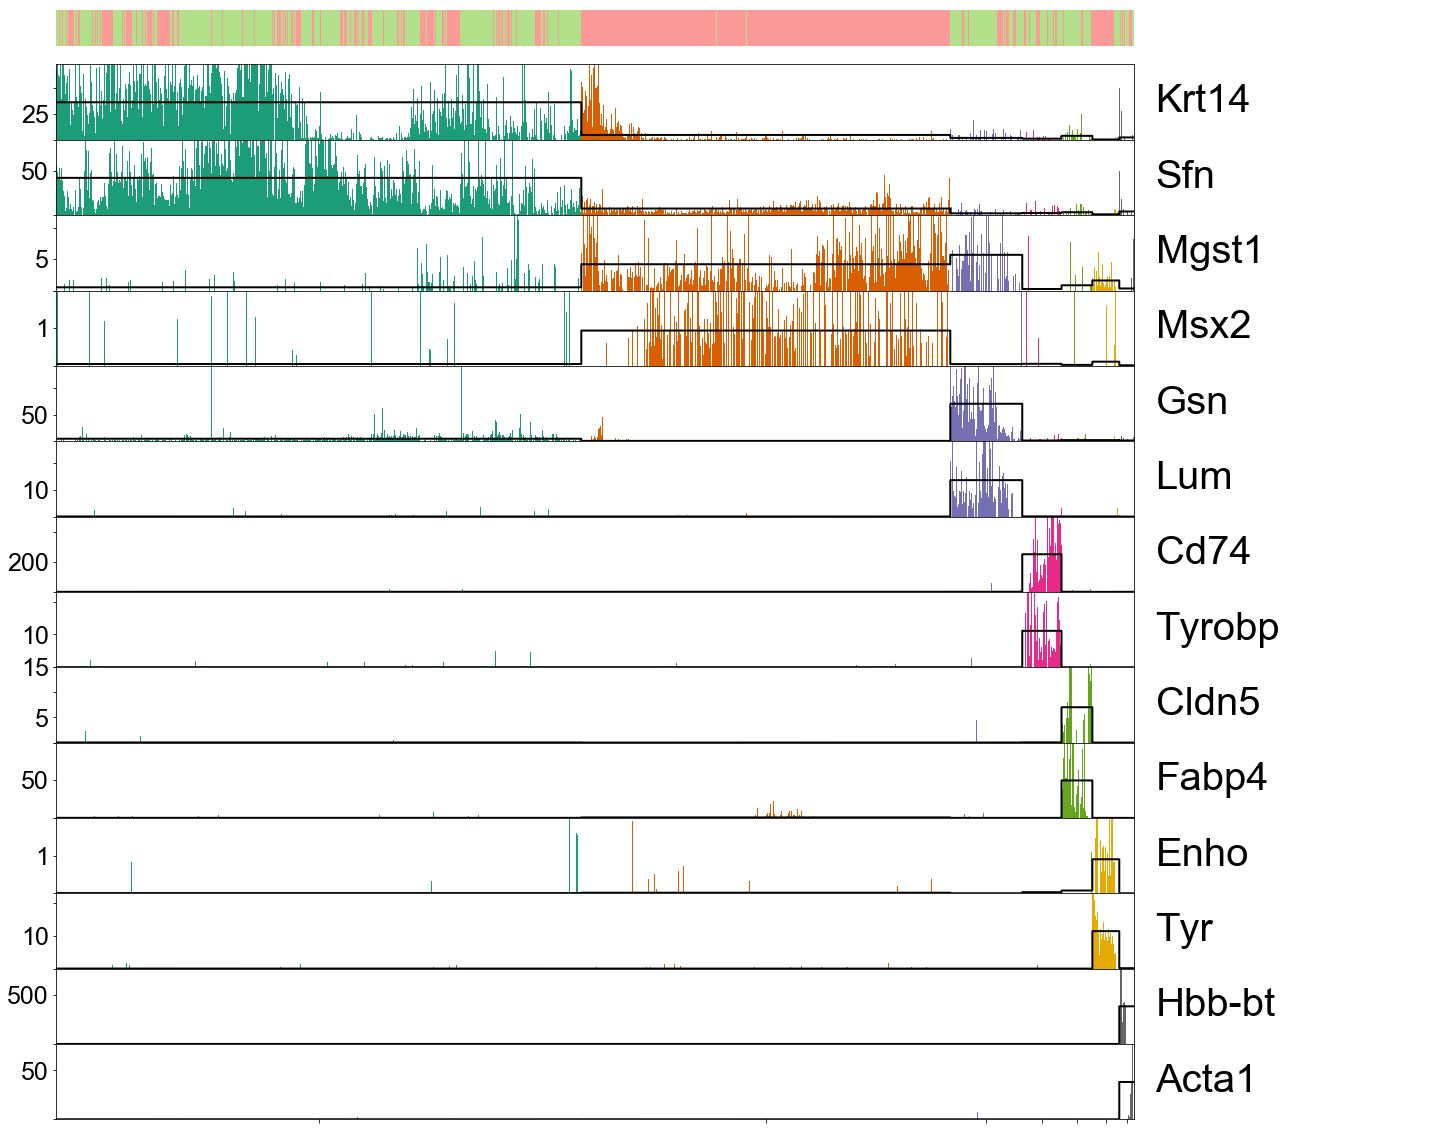

In [29]:
cell_groups = cl_c_1st[cl_c_1st!='JUNK']
dataset = seqN[cell_groups.index]
cmap = cmap_1st

#create figure

bar_size = 0.5
bar_pad = 0.25
width = 20
height = len(genes) * 1.1

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 2, hspace = 0.00, wspace = 0.0, top = 1 - ((bar_pad + bar_size) / height), right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = 0, width_ratios = [14,4])

#create GS for sample group bar

gs0 = plt.GridSpec(1,2, left = (bar_pad + bar_size) / width, right = 1, top = 1,
                       bottom = 1 - ((bar_size) / height), hspace = 0.0, wspace = 0.0, width_ratios = [14,4])

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for g in genes:
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create white space for gene names
        
        ax0 = plt.subplot(gs1[genes.index(g),1])
        clean_axis(ax0)
 
        #create axis
            
        ax0 = plt.subplot(gs1[genes.index(g),0])
        
        ax0.axvspan(0, len(dataset.columns), color = '#FFFFFF', zorder = 0)
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticks(get_cluster_ticks(cell_groups))
        ax0.xaxis.set_ticklabels([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = np.ceil(np.max(mean_tmp) * 2))
        ax0.set_ylabel(g, family = 'Arial', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos, tick in enumerate(ax0.yaxis.get_major_ticks()):
            if tick_pos % 2 == 1:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)
            else:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, linewidth = 0, width = 1.0)
        
        #draw means
        
        ax0.step(range(len(cell_groups)), [mean_tmp[val] for val in cell_groups], where = 'mid', color = 'black', linewidth = 2)

ax1 = plt.subplot(gs0[0,0])

ax1.set_xlim(0, len(cell_groups))

for pos, c in enumerate(cell_groups.index):
    
    ax1.axvspan(xmin = pos, xmax = pos + 1, color = cmap_time[cells_stage[c]])

remove_ticks(ax1, linewidth = 1)
clean_axis(ax1)

figname = 'v1.5_FigS1_bar_1st.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Validation of enrichment model

### 1st level clustering

In [63]:
stage_1st = pd.DataFrame(index = return_unique(cl_c_1st[cl_c_1st!='JUNK']), columns = ['all',
                                                                                       'n_5w','n_9w',
                                                                                       '%_5w','%_9w',
                                                                                       'ratio'])

for gr in return_unique(cl_c_1st[cl_c_1st!='JUNK']):
    c_sel = cl_c_1st[cl_c_1st==gr].index
    cnt = Counter(cells_stage[c_sel])
    stage_1st.loc[gr,'all'] = len(c_sel)
    stage_1st.loc[gr,'n_5w'] = cnt['5w']
    stage_1st.loc[gr,'n_9w'] = cnt['9w']
    stage_1st.loc[gr,'%_5w'] = cnt['5w'] / len(c_sel)
    stage_1st.loc[gr,'%_9w'] = cnt['9w'] / len(c_sel)
    stage_1st.loc[gr,'ratio'] = cnt['5w'] / cnt['9w']

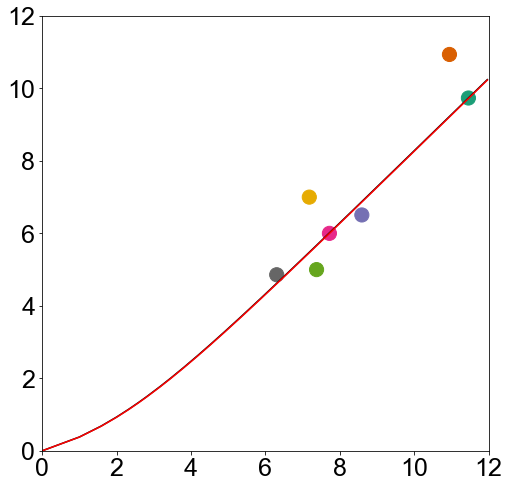

In [64]:
data = stage_1st.astype(float)
cmap = cmap_1st

#initialize figure

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

x_min, x_max = 0,12
y_min, y_max = 0,1

ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for tick_pos, tick in enumerate(ax.yaxis.get_major_ticks()):
    ax.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)
    
for tick_pos, tick in enumerate(ax.xaxis.get_major_ticks()):
    ax.xaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.xaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)

clist = [cmap[gr] for gr in data.index]

ax.scatter(x = np.log2(data['all'] + 1), y = np.log2(data['n_5w'] + 1), s = 200, c = clist)

x_range = np.arange(0,4001,1)
median = np.array([x * data['%_5w'].median() for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(median + 1), color = 'k')

pred = np.array([x * 0.29973024526812425 for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(pred + 1), color = 'r')


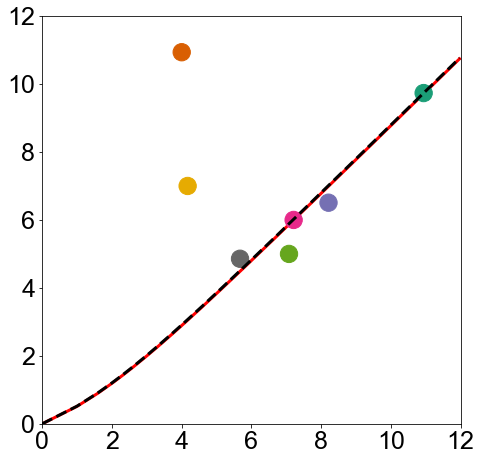

In [80]:
data = stage_1st.astype(float)
cmap = cmap_1st

#initialize figure

height = 7.5
width = 7.5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

x_min, x_max = 0,12
y_min, y_max = 0,1

ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for tick_pos, tick in enumerate(ax.yaxis.get_major_ticks()):
    ax.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)
    
for tick_pos, tick in enumerate(ax.xaxis.get_major_ticks()):
    ax.xaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.xaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)

clist = [cmap[gr] for gr in data.index]

ax.scatter(x = np.log2(data['n_9w'] + 1), y = np.log2(data['n_5w'] + 1), s = 300, c = clist)

x_range = np.arange(0,4001,1)

pred = np.array([x * 0.42802112077921606 for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(pred + 1), color = 'r', linewidth = 3, zorder = 0)

median = np.array([x * data['ratio'].median() for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(median + 1), color = 'k', linewidth = 3, linestyle = '--', zorder = 1)

figname = 'v1.5_FigS1_enr_val_1st.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### 2nd level clustering

In [65]:
stage_2nd = pd.DataFrame(index = return_unique(cl_c_2nd[cl_c_2nd!='JUNK']), columns = ['all',
                                                                                       'n_5w','n_9w',
                                                                                       '%_5w','%_9w',
                                                                                       'ratio'])

for gr in return_unique(cl_c_2nd[cl_c_2nd!='JUNK']):
    c_sel = cl_c_2nd[cl_c_2nd==gr].index
    cnt = Counter(cells_stage[c_sel])
    stage_2nd.loc[gr,'all'] = len(c_sel)
    stage_2nd.loc[gr,'n_5w'] = cnt['5w']
    stage_2nd.loc[gr,'n_9w'] = cnt['9w']
    stage_2nd.loc[gr,'%_5w'] = cnt['5w'] / len(c_sel)
    stage_2nd.loc[gr,'%_9w'] = cnt['9w'] / len(c_sel)
    stage_2nd.loc[gr,'ratio'] = (cnt['5w'] + 1) / (cnt['9w'] + 1) #to prevent division by zero

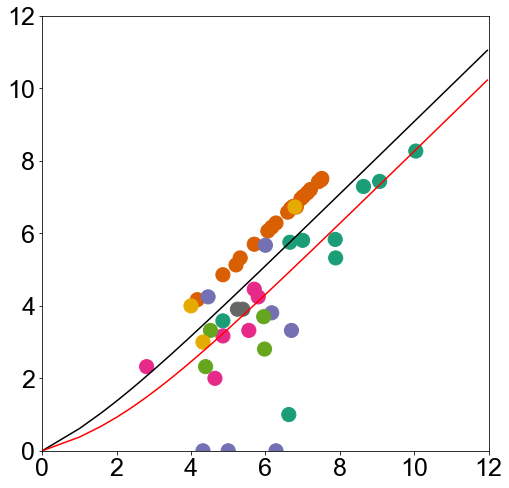

In [82]:
data = stage_2nd.astype(float)
cmap = cmap_1st

#initialize figure

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

x_min, x_max = 0,12
y_min, y_max = 0,1

ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for tick_pos, tick in enumerate(ax.yaxis.get_major_ticks()):
    ax.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)
    
for tick_pos, tick in enumerate(ax.xaxis.get_major_ticks()):
    ax.xaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.xaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)

clist = [cmap[gr.split(' - ')[0]] for gr in data.index]

ax.scatter(x = np.log2(data['all'] + 1), y = np.log2(data['n_5w'] + 1), s = 200, c = clist)

x_range = np.arange(0,4001,1)
median = np.array([x * data['%_5w'].median() for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(median + 1), color = 'k')

pred = np.array([x * 0.29973024526812425 for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(pred + 1), color = 'r')

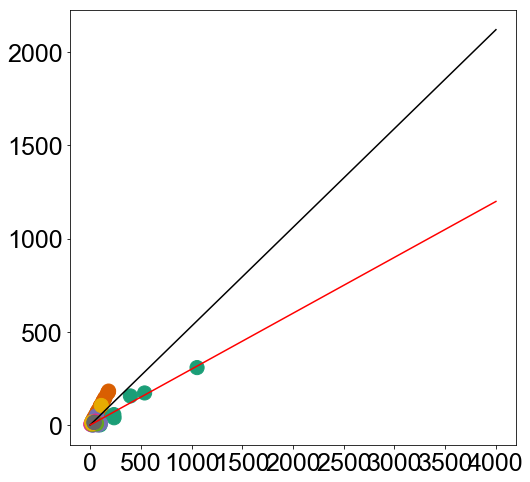

In [83]:
data = stage_2nd.astype(float)
cmap = cmap_1st

#initialize figure

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

x_min, x_max = 0,12
y_min, y_max = 0,1

#ax.set_xlim(x_min, x_max)
#ax.set_ylim(x_min, x_max)

for tick_pos, tick in enumerate(ax.yaxis.get_major_ticks()):
    ax.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)
    
for tick_pos, tick in enumerate(ax.xaxis.get_major_ticks()):
    ax.xaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.xaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)

clist = [cmap[gr.split(' - ')[0]] for gr in data.index]

ax.scatter(x = data['all'], y = data['n_5w'], s = 200, c = clist)

x_range = np.arange(0,4001,1)
median = np.array([x * data['%_5w'].median() for x in x_range])
ax.plot(x_range, median, color = 'k')

pred = np.array([x * 0.29973024526812425 for x in x_range])
ax.plot(x_range, pred, color = 'r')

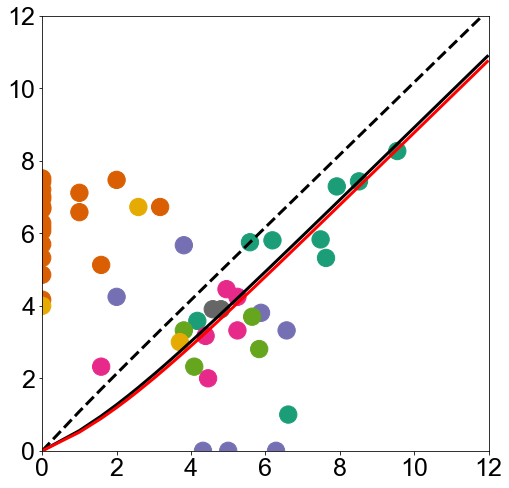

In [68]:
data = stage_2nd.astype(float)
gr_sel = [gr for gr in data.index if gr.split(' - ')[0] != 'ANA']
cmap = cmap_1st

#initialize figure

height = 8
width = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

x_min, x_max = 0,12
y_min, y_max = 0,1

ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for tick_pos, tick in enumerate(ax.yaxis.get_major_ticks()):
    ax.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)
    
for tick_pos, tick in enumerate(ax.xaxis.get_major_ticks()):
    ax.xaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
    ax.xaxis.get_major_ticks()[tick_pos].label.set_fontsize(25)

clist = [cmap[gr.split(' - ')[0]] for gr in data.index]

ax.scatter(x = np.log2(data['n_9w'] + 1), y = np.log2(data['n_5w'] + 1), s = 300, c = clist)

x_range = np.arange(0,4001,1)

median = np.array([x * data.loc[gr_sel,'ratio'].median() for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(median + 1), color = 'k', linewidth = 3)

median = np.array([x * data['ratio'].median() for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(median + 1), color = 'k', linewidth = 3, linestyle = '--')

pred = np.array([x * 0.42802112077921606 for x in x_range])
ax.plot(np.log2(x_range + 1), np.log2(pred + 1), color = 'r', linewidth = 3)

figname = 'v1.5_FigS1_enr_val_2nd.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Sequencing yield

In [24]:
c_sel = cl_c_1st[cl_c_1st!='JUNK'].index
c_sel_5w = cells_stage.loc[c_sel][cells_stage.loc[c_sel]=='5w'].index
c_sel_9w = cells_stage.loc[c_sel][cells_stage.loc[c_sel]=='9w'].index

In [25]:
np.sum(seq[c_sel_9w].sum()>1500)

1245

In [26]:
2543 / 3149

0.8075579549063194

In [27]:
672/2618

0.25668449197860965

In [28]:
print(len(c_sel_5w), len(c_sel_9w))

3149 2618


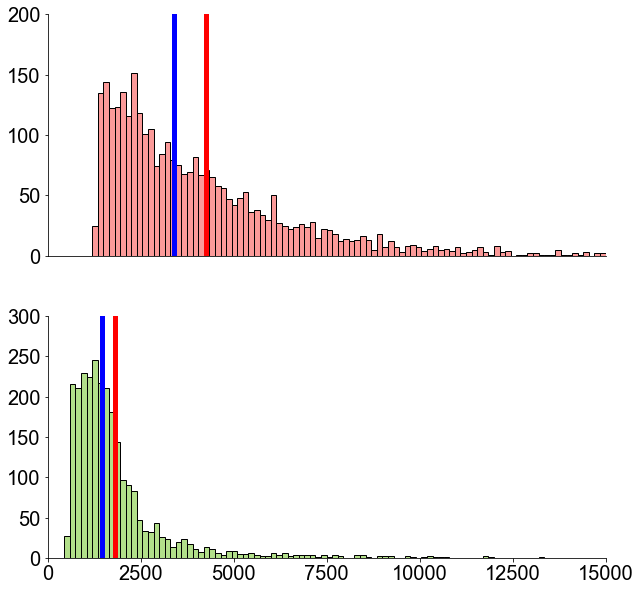

In [90]:
rep1 = seq[c_sel_5w].sum()
rep2 = seq[c_sel_9w].sum()

#initialize figure

height = 2 * 5
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 1, hspace = 0.25, wspace = 0.0)

xmin = 0
xmax = 15000
ymin = 0
ymax = 300

#plot anagen data

ax = plt.subplot(gs[0])
ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(np.mean(rep1), color = 'red', lw = 5)
ax.axvline(np.median(rep1), color = 'blue', lw = 5)

ax.hist(rep1, bins = 100, range = (xmin, xmax), color = cmap_time['5w'], linewidth = 1, edgecolor = 'black')

ax.set_yticks([0,50,100,150,200])
ax.set_yticklabels([0,50,100,150,200], family = 'Arial', fontsize = 20)
ax.set_xticks([])

#plot telogen data

ax = plt.subplot(gs[1])

ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(np.mean(rep2), color = 'red', lw = 5)
ax.axvline(np.median(rep2), color = 'blue', lw = 5)

ax.hist(rep2, bins = 100, range = (xmin, xmax), color = cmap_time['9w'], linewidth = 1, edgecolor = 'black')

ax.set_yticks([0,50,100,150,200,250,300])
ax.set_yticklabels([0,50,100,150,200,250,300], family = 'Arial', fontsize = 20)
ax.set_xticks([0,2500,5000,7500,10000,12500,15000])
ax.set_xticklabels([0,2500,5000,7500,10000,12500,15000], family = 'Arial', fontsize = 20)

figname = 'v1.5_FigS1_molecules_raw.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

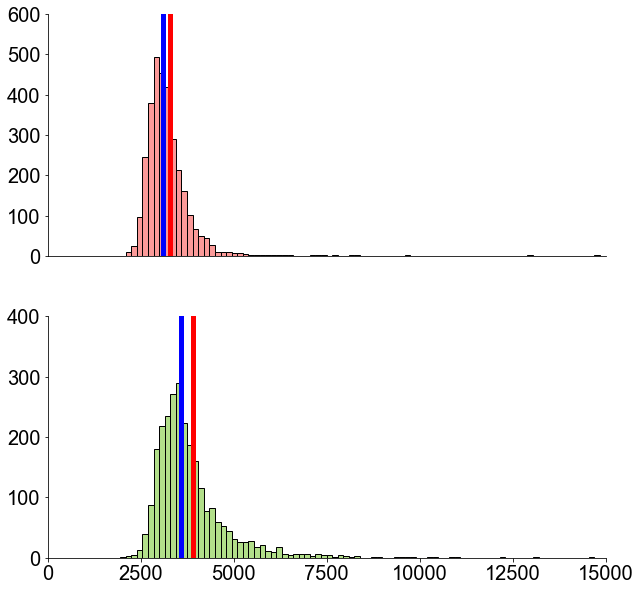

In [91]:
rep1 = seqN[c_sel_5w].sum()
rep2 = seqN[c_sel_9w].sum()

#initialize figure

height = 2 * 5
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 1, hspace = 0.25, wspace = 0.0)

xmin = 0
xmax = 15000
ymin = 0
ymax = 300

#plot anagen data

ax = plt.subplot(gs[0])
ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(np.mean(rep1), color = 'red', lw = 5)
ax.axvline(np.median(rep1), color = 'blue', lw = 5)

ax.hist(rep1, bins = 100, range = (xmin, xmax), color = cmap_time['5w'], linewidth = 1, edgecolor = 'black')

ax.set_yticks([0,100,200,300,400,500,600])
ax.set_yticklabels([0,100,200,300,400,500,600], family = 'Arial', fontsize = 20)
ax.set_xticks([])

#plot telogen data

ax = plt.subplot(gs[1])

ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(np.mean(rep2), color = 'red', lw = 5)
ax.axvline(np.median(rep2), color = 'blue', lw = 5)

ax.hist(rep2, bins = 100, range = (xmin, xmax), color = cmap_time['9w'], linewidth = 1, edgecolor = 'black')

ax.set_yticks([0,100,200,300,400])
ax.set_yticklabels([0,100,200,300,400], family = 'Arial', fontsize = 20)
ax.set_xticks([0,2500,5000,7500,10000,12500,15000])
ax.set_xticklabels([0,2500,5000,7500,10000,12500,15000], family = 'Arial', fontsize = 20)

figname = 'v1.5_FigS1_molecules_norm.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Sequencing yield with validation data

In [47]:
def sc2pd(scdata, layer, sparse = True):
    
    if sparse:
        return pd.DataFrame(scdata.layers[layer].T.todense(),
                            index = scdata.var_names,
                            columns = scdata.obs_names)
    
    else:
        return pd.DataFrame(scdata.layers[layer].T,
                            index = scdata.var_names,
                            columns = scdata.obs_names)

In [51]:
X = sc.read_h5ad('%s/%s_X_MKnew.h5' % (path_output, exp_id))

In [29]:
X_1st = sc.read_h5ad('%s/%s_Xs_MKnew_1st_v2.h5' % (path_output, exp_id))

In [33]:
c_sel_val = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']!='JUNK'].index
c_sel_5w_val = X_1st.obs['stage'][c_sel_val][X_1st.obs['stage'][c_sel_val]=='anagen'].index
c_sel_9w_val = X_1st.obs['stage'][c_sel_val][X_1st.obs['stage'][c_sel_val]=='telogen'].index

In [34]:
len(c_sel_val)

7601

In [35]:
len(c_sel_5w_val)

4244

In [36]:
len(c_sel_9w_val)

3357

In [55]:
Xpd_raw = sc2pd(X, 'raw')
Xpd_norm = sc2pd(X, 'norm')

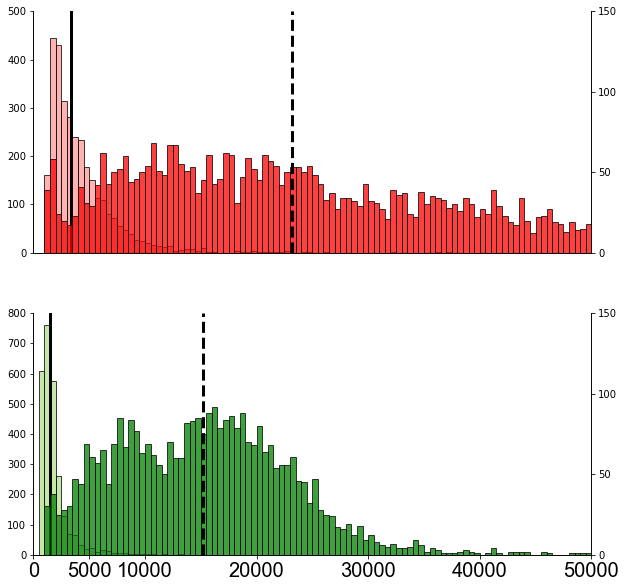

In [120]:
rep_ana_M = seq[c_sel_5w].sum()
rep_ana_V = Xpd_raw[c_sel_5w_val].sum()
rep_tel_M = seq[c_sel_9w].sum()
rep_tel_V = Xpd_raw[c_sel_9w_val].sum()

#initialize figure

height = 2 * 5
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 1, hspace = 0.25, wspace = 0.0)

xmin = 0
xmax = 50000
ymin0 = 0
ymax0 = 500
ymin1 = 0
ymax1 = 150

#anagen

ax0 = plt.subplot(gs[0])
ax1 = ax0.twinx()
ax0.set_xlim(xmin,xmax)
ax1.set_xlim(xmin,xmax)

ax0.set_ylim(ymin0,ymax0)
ax1.set_ylim(ymin1,ymax1)
ax0.spines['top'].set_color('none')
ax1.spines['top'].set_color('none')

ax0.set_yticks([0,100,200,300,400,500])
ax1.set_yticks([0,50,100,150])
ax0.set_xticks([])
ax1.set_xticks([])

ax0.axvline(np.median(rep_ana_M), color = 'k', lw = 3)
ax1.axvline(np.median(rep_ana_V), color = 'k', lw = 3, linestyle = '--')

ax1.hist(rep_ana_V, bins = 100, range = (xmin, xmax), color = 'red', linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)
ax0.hist(rep_ana_M, bins = 100, range = (xmin, xmax), color = cmap_time['5w'], linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)

#telogen

ax0 = plt.subplot(gs[1])
ax1 = ax0.twinx()
ax0.set_xlim(xmin,xmax)
ax1.set_xlim(xmin,xmax)

ax0.set_ylim(ymin0,ymax0)
ax1.set_ylim(ymin1,ymax1)
ax0.spines['top'].set_color('none')
ax1.spines['top'].set_color('none')

ax0.set_yticks([0,100,200,300,400,500,600,700,800])
ax1.set_yticks([0,50,100,150])
ax0.set_xticks([])
ax1.set_xticks([])

ax0.axvline(np.median(rep_tel_M), color = 'k', lw = 3)
ax1.axvline(np.median(rep_tel_V), color = 'k', lw = 3, linestyle = '--')

ax0.hist(rep_tel_M, bins = 100, range = (xmin, xmax), color = cmap_time['9w'], linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)
ax1.hist(rep_tel_V, bins = 100, range = (xmin, xmax), color = 'green', linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)

ax0.set_xticks([0,5000,10000,20000,30000,40000,50000])
ax0.set_xticklabels([0,5000,10000,20000,30000,40000,50000], family = 'Arial', fontsize = 20)

figname = 'v1.5_FigS1_molecules_raw.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

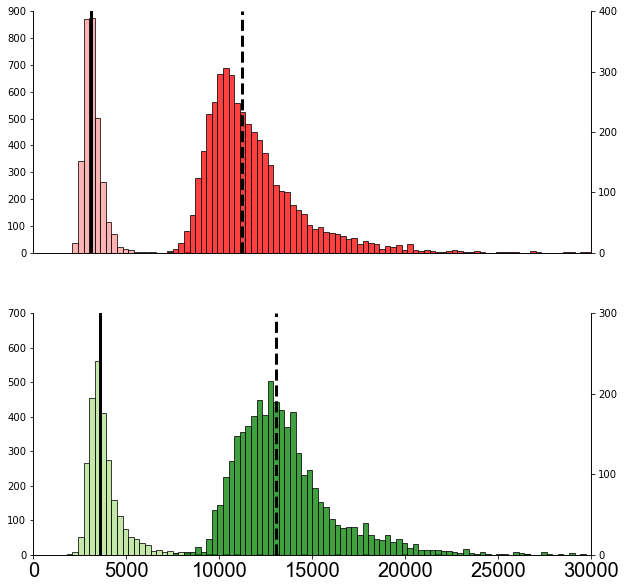

In [122]:
rep_ana_M = seqN[c_sel_5w].sum()
rep_ana_V = Xpd_norm[c_sel_5w_val].sum()
rep_tel_M = seqN[c_sel_9w].sum()
rep_tel_V = Xpd_norm[c_sel_9w_val].sum()

#initialize figure

height = 2 * 5
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 1, hspace = 0.25, wspace = 0.0)

xmin = 0
xmax = 30000
ymin0 = 0
ymax0 = 500
ymin1 = 0
ymax1 = 150

#anagen

ax0 = plt.subplot(gs[0])
ax1 = ax0.twinx()
ax0.set_xlim(xmin,xmax)
ax1.set_xlim(xmin,xmax)

ax0.set_ylim(ymin0,ymax0)
ax1.set_ylim(ymin1,ymax1)
ax0.spines['top'].set_color('none')
ax1.spines['top'].set_color('none')

ax0.set_yticks([0,100,200,300,400,500,600,700,800,900])
ax1.set_yticks([0,100,200,300,400])
ax0.set_xticks([])
ax1.set_xticks([])

ax0.axvline(np.median(rep_ana_M), color = 'k', lw = 3)
ax1.axvline(np.median(rep_ana_V), color = 'k', lw = 3, linestyle = '--')

ax1.hist(rep_ana_V, bins = 100, range = (xmin, xmax), color = 'red', linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)
ax0.hist(rep_ana_M, bins = 100, range = (xmin, xmax), color = cmap_time['5w'], linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)

#telogen

ax0 = plt.subplot(gs[1])
ax1 = ax0.twinx()
ax0.set_xlim(xmin,xmax)
ax1.set_xlim(xmin,xmax)

ax0.set_ylim(ymin0,ymax0)
ax1.set_ylim(ymin1,ymax1)
ax0.spines['top'].set_color('none')
ax1.spines['top'].set_color('none')

ax0.set_yticks([0,100,200,300,400,500,600,700])
ax1.set_yticks([0,100,200,300])
ax0.set_xticks([])
ax1.set_xticks([])

ax0.axvline(np.median(rep_tel_M), color = 'k', lw = 3)
ax1.axvline(np.median(rep_tel_V), color = 'k', lw = 3, linestyle = '--')

ax0.hist(rep_tel_M, bins = 100, range = (xmin, xmax), color = cmap_time['9w'], linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)
ax1.hist(rep_tel_V, bins = 100, range = (xmin, xmax), color = 'green', linewidth = 1, edgecolor = 'black', 
        alpha = 0.75)

ax0.set_xticks([0,5000,10000,15000, 20000, 25000, 30000])
ax0.set_xticklabels([0,5000,10000,15000, 20000, 25000, 30000], family = 'Arial', fontsize = 20)

figname = 'v1.5_FigS1_molecules_norm.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Anagen-telogen distribution (2nd level clusters)

In [23]:
def stage_get_pval_binomial_distr(n, p, N):
    
    """
    n: number of trials == number of cells in a population
    p: success probability == percentage of anagen cells in whole dataset
    N: number of successes == number of anagen cells in population
    -----
    returns
    pval telogen enrichment: probability to observe N or less anagen cells at random
    pval anagen enrichment: probability to observe n-N or less telogen cells at random
    """
    
    return scipy.stats.binom.cdf(N, n, p), scipy.stats.binom.cdf(n-N, n, 1-p)

In [24]:
Ca = np.mean([7.7e5, 20.0e5, 12.0e5])
Ct = np.mean([5.2e5, 4.2e5])

In [25]:
print(Ca, Ct)

1323333.3333333333 470000.0


In [26]:
Sa = len(cells_stage[cl_c_1st.index][cells_stage[cl_c_1st.index]=='5w'])
St = len(cells_stage[cl_c_1st.index][cells_stage[cl_c_1st.index]=='9w'])

In [27]:
perc_anagen_all = (Sa * Ct) / ((St * Ca) + (Sa * Ct))

In [28]:
perc_anagen_all

0.29973024526812425

In [29]:
stage_quant_2nd = pd.DataFrame(index = return_unique(cl_c_2nd), columns = ['count anagen',
                                                                           '% anagen',
                                                                           'count telogen',
                                                                           '% telogen',
                                                                           'proba - 5w',
                                                                           'proba - 9w'])

for gr in return_unique(cl_c_2nd):
    c_sel = cl_c_2nd[cl_c_2nd==gr].index
    count_tmp = Counter(cells_stage[c_sel])
    
    stage_quant_2nd.loc[gr,'count anagen'] = count_tmp['5w']
    stage_quant_2nd.loc[gr,'% anagen'] = stage_quant_2nd.loc[gr,'count anagen'] / len(c_sel)
    stage_quant_2nd.loc[gr,'count telogen'] = count_tmp['9w']
    stage_quant_2nd.loc[gr,'% telogen'] = stage_quant_2nd.ix[gr,'count telogen'] / len(c_sel)
    stage_quant_2nd.loc[gr,['proba - 9w','proba - 5w']] = stage_get_pval_binomial_distr(len(c_sel), perc_anagen_all, stage_quant_2nd.ix[gr,'count anagen'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [30]:
len(set(cl_c_2nd[cl_c_2nd!='JUNK']))

51

In [31]:
stage_quant_2nd

,count anagen,% anagen,count telogen,% telogen,proba - 5w,proba - 9w
EPI - 0,53,0.53,47,0.47,1.31084e-06,1
EPI - 1,308,0.29222,746,0.70778,0.713188,0.31024
EPI - 2,172,0.320298,365,0.679702,0.160261,0.861349
EPI - 3,39,0.165254,197,0.834746,0.999999,1.4399e-06
EPI - 4,156,0.392947,241,0.607053,4.65399e-05,0.99997
EPI - 5,55,0.433071,72,0.566929,0.00099494,0.99947
EPI - 6,11,0.392857,17,0.607143,0.190453,0.897746
EPI - 7,56,0.239316,178,0.760684,0.983226,0.0240665
EPI - 8,1,0.0102041,97,0.989796,1,2.94394e-14
ANA - 1,51,1,0,0,2.05712e-27,1


In [32]:
ix_sel = return_unique(cl_c_2nd[cl_c_2nd!='JUNK'])
stage_quant_2nd_bin = pd.DataFrame(0, index = range(5), columns = ix_sel)
thr1 = 1e-3/51
thr2 = 1e-5/51

for i in ix_sel:
    pval_tel, pval_ana = stage_quant_2nd.loc[i, 'proba - 9w'], stage_quant_2nd.loc[i, 'proba - 5w']
    if pval_tel < pval_ana:
        if pval_tel < thr2: stage_quant_2nd_bin.loc[4,i]=1
        elif pval_tel < thr1: stage_quant_2nd_bin.loc[3,i]=1
        else: stage_quant_2nd_bin.loc[2,i]=1
    if pval_tel > pval_ana:
        if pval_ana < thr2: stage_quant_2nd_bin.loc[0,i]=1
        elif pval_ana < thr1: stage_quant_2nd_bin.loc[1,i]=1
        else: stage_quant_2nd_bin.loc[2,i]=1
            

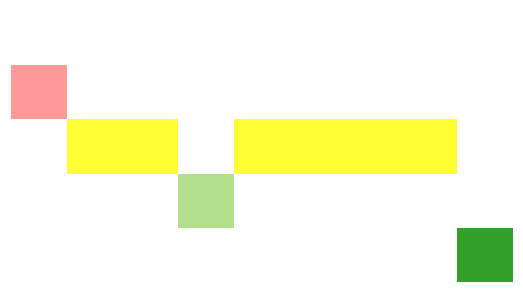

In [89]:
ix_sel = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='EPI']
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_EPI.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

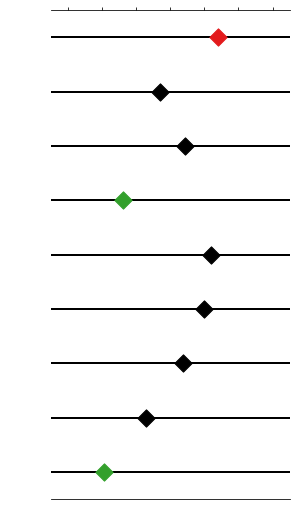

In [53]:
#define input variables

groups = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='EPI']
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time

#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#set significance tresholds

thr = np.log2(-np.log10(0.001/51)+1) #bonferroni corrected

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_EPI_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [54]:
gr_order_ANA = ['ANA - 1','ANA - 21','ANA - 0','ANA - 2','ANA - 3','ANA - 20',
                'ANA - 12','ANA - 15','ANA - 13','ANA - 16',
                'ANA - 18','ANA - 8',
                'ANA - 14','ANA - 6','ANA - 7','ANA - 10','ANA - 11',
                'ANA - 17','ANA - 5','ANA - 4']

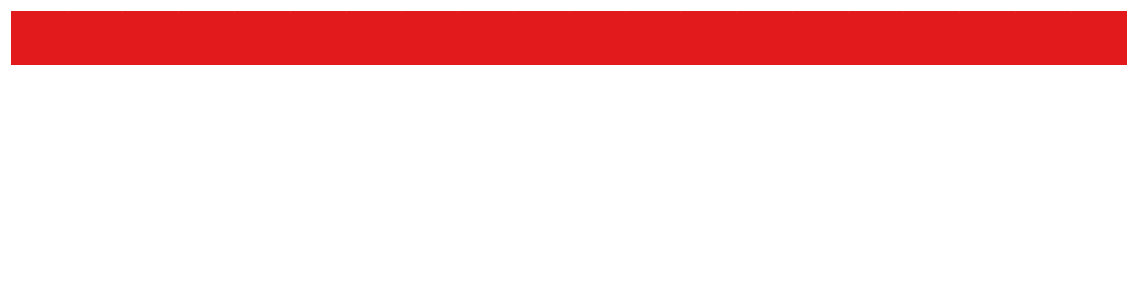

In [34]:
ix_sel = gr_order_ANA
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_ANA.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

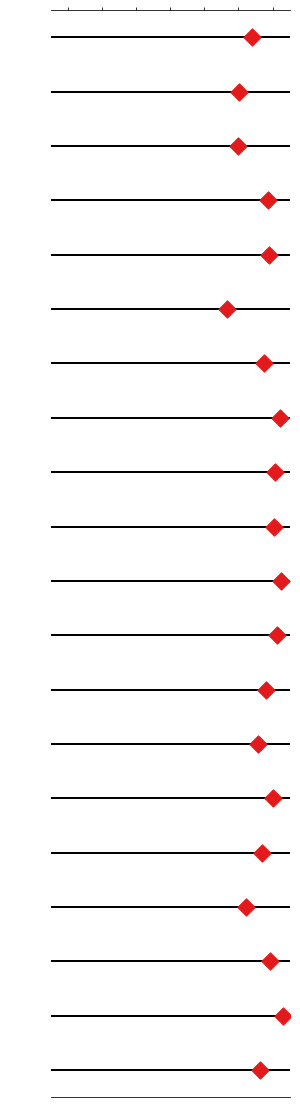

In [62]:
#define input variables

groups = gr_order_ANA
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_ANA_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

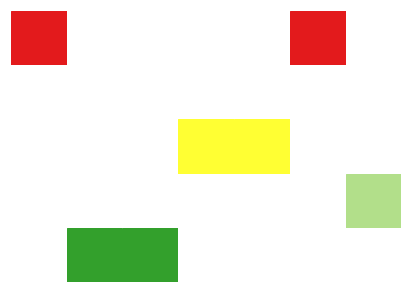

In [100]:
ix_sel = ['FIB - 3', 'FIB - 4', 'FIB - 5', 'FIB - 6', 'FIB - 1', 'FIB - 2', 'FIB - 0']
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_FIB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

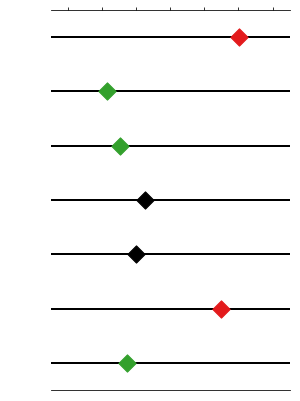

In [56]:
#define input variables

groups = ['FIB - 3', 'FIB - 4', 'FIB - 5', 'FIB - 6', 'FIB - 1', 'FIB - 2', 'FIB - 0']
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_FIB_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

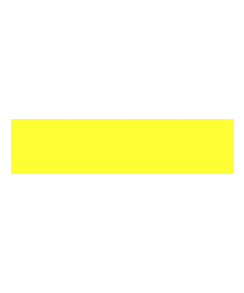

In [92]:
ix_sel = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='VASC']
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_VASC.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

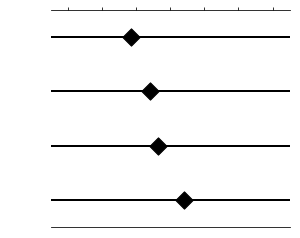

In [57]:
#define input variables

groups = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='VASC']
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_VASC_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

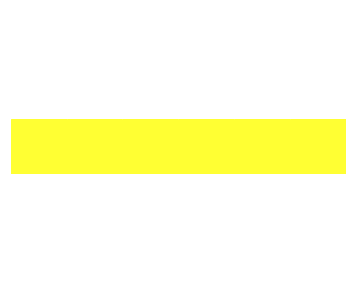

In [93]:
ix_sel = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='IMM']
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_IMM.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

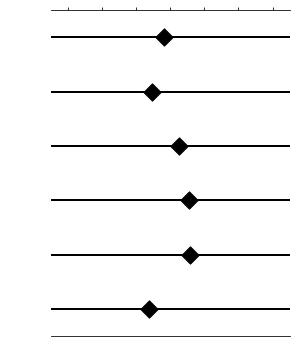

In [58]:
#define input variables

groups = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='IMM']
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_IMM_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

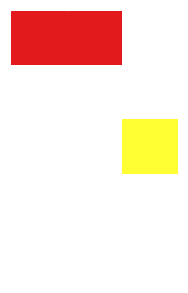

In [94]:
ix_sel = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='MEL']
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_MEL.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

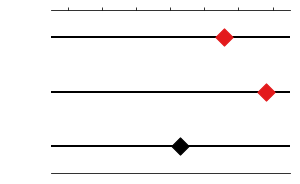

In [59]:
#define input variables

groups = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='MEL']
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_MEL_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

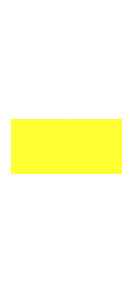

In [95]:
ix_sel = [gr for gr in return_unique(cl_c_2nd) if gr.split(' - ')[0]=='MISC']
data = stage_quant_2nd_bin
cmap = {0:'#e31a1c',1:'#fb9a99',2:'#ffff33',3:'#b2df8a',4:'#33a02c'}

#initialize figure

height = 5
width = 1 * len(ix_sel)

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(5, len(ix_sel), hspace = 0.0, wspace = 0.0)

for i, gr in enumerate(ix_sel):
    for p in range(5):
        ax = plt.subplot(gs[p,i])
        ax.set_xlim(0,1)
        if data.loc[p,gr] == 1: ax.axvspan(0,1, color = cmap[p])
        else: ax.axvspan(0,1, color = '#ffffff')
        clean_axis(ax)
        
figname = 'v1.5_Fig1_enr_MISC.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

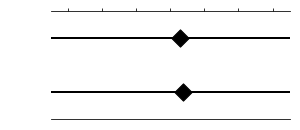

In [60]:
#define input variables

groups = ['MISC - 1', 'MISC - 0']
L = len(groups)
pval_ana = -np.log10(stage_quant_2nd.loc[groups,'proba - 5w'].astype(float))
pval_ana[pval_ana > 128] = 100
pval_tel = -np.log10(stage_quant_2nd.loc[groups,'proba - 9w'].astype(float))
pval_tel[pval_tel > 128] = 100
cmap = cmap_time


#initialize figure

height = L * 1
width = 5

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.0, wspace = 0.1, width_ratios = [1,9])

#create name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)

#create pval axes
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks_position('top')

#iterate over groups
    
for ix, gr in enumerate(groups):
    #ax0.text(0.5, ix, nmap[gr], family = 'Arial', fontsize = 30, ha = 'center', va = 'center')
    ax1.axhline(ix, color = 'k', lw = 2, zorder = 1)
        
    #print background
    """    
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
    if ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
        ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
    """    
    #print pvals

    if pval_ana[gr] < pval_tel[gr]:
        if np.log2(pval_tel[gr]+1) >= thr:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = '#33a02c', zorder = 2)
        else:
            ax1.scatter(-np.log2(pval_tel[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
    if pval_ana[gr] > pval_tel[gr]:
        if np.log2(pval_ana[gr]+1) >= thr:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = '#e31a1c', zorder = 2)
        else:
            ax1.scatter(np.log2(pval_ana[gr]+1), ix, marker = 'D', s = 150, color = 'black', zorder = 2)
        
#set xaxis

xmin = -7
xmax = 7

ticklabels = ['$10^{-64}$','$10^{-16}$','$10^{-4}$','$0$','$10^{-4}$','$10^{-16}$','$10^{-64}$']

ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-6,-4,-2,0,2,4,6])
ax1.set_xticklabels([])

"""
ax1.axvspan(-7,
            -thr,
            color = cmap['9w'], alpha = 0.5)

ax1.axvspan(thr,
            7,
            color = cmap['5w'], alpha = 0.5)
"""

#plot for combination with illustrator gradient

ax1.axvspan(-thr,
            thr,
            color = 'white', alpha = 1, zorder = 0)

figname = 'v1.5_Fig1_enr_MISC_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)